#### 사이파이를 사용하여 등식 제한조건이 있는 최적화 문제 계산하기

In [4]:
import scipy as sp
import scipy.optimize

In [5]:
def f1arr(x):
    return x[0]**2 +x[1]**2

def eq_constraint(x):
    return x[0]+x[1] -1

sp.optimize.fmin_slsqp(f1arr, np.array([1,1]),eqcons=[eq_constraint])

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.5000000000000002
            Iterations: 2
            Function evaluations: 8
            Gradient evaluations: 2


array([0.5, 0.5])

### 사이파이를 사용하여 부등식 제한조건이 있는 최적화 문제 계산하기

In [7]:
# 예제 5.2.40의 제한 조건을 하나의 식으로 표현
def f2(x):
    return np.sqrt((x[0]-4)**2+(x[1]-2)**2)

# 제한조건 상수
k=1
def ieq_constraint(x):
    return np.atleast_1d(k-np.sum(np.abs(x)))

sp.optimize.fmin_slsqp(f2,np.array([0,0]),ieqcons=[ieq_constraint])

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 3.605551280732028
            Iterations: 11
            Function evaluations: 77
            Gradient evaluations: 11


array([9.99999981e-01, 1.89941792e-08])

#### CVXPY를 이용한 선형계획법 문제 계산

In [6]:
import cvxpy as cp

In [8]:
# 변수 정의
a=cp.Variable()
b=cp.Variable()

# 조선의 정의
constraints=[
    a>=100,
    b>=100,
    a+2*b<=500,
    4*a+5*b<=9800,
]

# 문제점 정의
obj=cp.Maximize(3*a+5*b)
prob=cp.Problem(obj,constraints)

# 계산
prob.solve()

# 결과
print("상태: ",prob.status)
print("최적값: ",a.value,b.value)

상태:  optimal
최적값:  299.99999911572195 100.00000058337798


In [9]:
# 위방법은 변수가 1000개??넘어가면 느려짐

#### 집합과 원소

In [26]:
A=set([1,2,3,3,2]) # 중복된 자료는 없어진다.
A,len(A)

({1, 2, 3}, 3)

In [21]:
A=set({12,2}) # 튜플은 set의 원소가 될 수 있음

In [24]:
A=set([[1],2,3]) # list는 set의 원소가 될 수 없음

TypeError: unhashable type: 'list'

In [20]:
B = frozenset({'H','T'})
B

frozenset({'H', 'T'})

In [12]:
# setdms {}을 사용하여 만들 수도 있다.
C={"\u2660","\u2661","\u2662","\u2663"}
C

{'♠', '♡', '♢', '♣'}

In [25]:
type(C),type(B)

(set, frozenset)

In [27]:
# 집합의 크기 (cardinality)
len(A),len(B),len(C)

(3, 2, 4)

#### 합집합과 교집합

In [28]:
A1 =set([1,2,3,4])
A2 =set([2,4,6])
A3 =set([1,2,3])
A4 =set([2,3,4,5,6])

In [29]:
# 합집합1
A1.union(A2)

{1, 2, 3, 4, 6}

In [30]:
# 합집합2
A2|A1

{1, 2, 3, 4, 6}

In [33]:
# 교집합1
A3.intersection(A4)

{2, 3}

In [34]:
# 교집합2
A4&A3

{2, 3}

In [35]:
# 부분집합 A3가 A1의 부분집합인지 구함
A3.issubset(A1)

True

In [36]:
A3<=A1

True

In [37]:
A3.issubset(A2)

False

In [38]:
# 모든 집합은 자기 자신의 부분집합이다.
A3<=A3

True

In [39]:
# 모든 집합은 자기 자신의 진부분 집합이 아니다.
A3<A3

False

In [40]:
# 차집합과 여집합
A1.difference(A2)

{1, 3}

In [41]:
A1-A2

{1, 3}

In [43]:
# 공집합
empty_set=set([])
empty_set

set()

In [44]:
empty_set<A1

True

In [45]:
empty_set.intersection(A1)

set()

In [46]:
empty_set.union(A1)

{1, 2, 3, 4}

In [52]:
# 연습문제 6.1.1
A1=frozenset([])
A2=frozenset(["HH"])
A3=frozenset(["HH","HT"])
A4=frozenset(["HH","TH"])
A5=frozenset(["HH","TT"])
A6=frozenset(["HH","HT","TH"])
A7=frozenset(["HH","HT","TT"])
A8=frozenset(["HH","HT","TH","TT"])
A9=frozenset(["HT"])
A10=frozenset(["HT","TH"])
A11=frozenset(["HT","TT"])
A12=frozenset(["HT","TH","TT"])
A13=frozenset(["TH"])
A14=frozenset(["TH","TT"])
A15=frozenset(["TT"])
A16=frozenset(["HH","TH","TT"])

In [53]:
set([A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16])

{frozenset(),
 frozenset({'TT'}),
 frozenset({'HT', 'TT'}),
 frozenset({'HH'}),
 frozenset({'HH', 'TT'}),
 frozenset({'HH', 'HT', 'TT'}),
 frozenset({'TH'}),
 frozenset({'HH', 'TH', 'TT'}),
 frozenset({'HT', 'TH'}),
 frozenset({'HH', 'HT'}),
 frozenset({'HH', 'TH'}),
 frozenset({'HT'}),
 frozenset({'HH', 'HT', 'TH'}),
 frozenset({'TH', 'TT'}),
 frozenset({'HT', 'TH', 'TT'}),
 frozenset({'HH', 'HT', 'TH', 'TT'})}

In [54]:
# 위 문제는 itertools에 있는 chain과 combinations를 쓰면 더 간단
from itertools import chain, combinations

In [56]:
def get_set_of_subsets(omega):
    return set([frozenset(s) for s in chain.from_iterable(combinations(omega,r)for r in range(len(omega)+1))])

In [57]:
get_set_of_subsets((["HH","HT","TH","TT"]))

{frozenset(),
 frozenset({'TT'}),
 frozenset({'HT', 'TT'}),
 frozenset({'HH'}),
 frozenset({'HH', 'TT'}),
 frozenset({'HH', 'HT', 'TT'}),
 frozenset({'TH'}),
 frozenset({'TH', 'TT'}),
 frozenset({'HH', 'TH', 'TT'}),
 frozenset({'HT', 'TH'}),
 frozenset({'HH', 'HT'}),
 frozenset({'HH', 'TH'}),
 frozenset({'HT'}),
 frozenset({'HH', 'HT', 'TH'}),
 frozenset({'HT', 'TH', 'TT'}),
 frozenset({'HH', 'HT', 'TH', 'TT'})}

In [77]:
# len(omega)+1 : 0~4까지를 차례로 넣어
# combinations ([집합],n): 집합에 대하여 n개의 원소를 갖는 조합을 생성
frozenset(combinations((["HH","HT","TH","TT"]),1))

frozenset({('HH',), ('HT',), ('TH',), ('TT',)})

In [84]:
# 연습문제 6.1.2 합집합과 교집합의 분배법칙
A=set([1,3,5])
B=set([1,2,3])
C=set([2,4,6])

set

In [85]:
A|(B & C) == (A|B)&(A|C)

True

In [86]:
A&(B|C) == (A&B)|(A&C)

True

In [90]:
# 파이썬을 이용한 확률의 구현
A=frozenset([])
B=frozenset(["H"])
C=frozenset(["T"])
D=frozenset(["H","T"])

In [92]:
P = {A: 0, B: 0.4, C: 0.6, D: 1}
P

{frozenset(): 0,
 frozenset({'H'}): 0.4,
 frozenset({'T'}): 0.6,
 frozenset({'H', 'T'}): 1}

In [93]:
# 연습문제 6.2.5
A1=frozenset([])
A2=frozenset(["HH"])
A3=frozenset(["HH","HT"])
A4=frozenset(["HH","TH"])
A5=frozenset(["HH","TT"])
A6=frozenset(["HH","HT","TH"])
A7=frozenset(["HH","HT","TT"])
A8=frozenset(["HH","HT","TH","TT"])
A9=frozenset(["HT"])
A10=frozenset(["HT","TH"])
A11=frozenset(["HT","TT"])
A12=frozenset(["HT","TH","TT"])
A13=frozenset(["TH"])
A14=frozenset(["TH","TT"])
A15=frozenset(["TT"])
A16=frozenset(["HH","TH","TT"])

In [102]:
P={A1:0,
   A2:0.25,
   A3:0.5,
   A4:0.5,
   A5:0.5,
   A6:0.75,
   A7:0.75,
   A8:1,
   A9:0.25,
   A10:0.1,
   A11:0.5,
   A12:0.75,
   A13:0.25,
   A14:0.5,
   A15:0.25,
   A16:0.75}
P

{frozenset(): 0,
 frozenset({'HH'}): 0.25,
 frozenset({'HH', 'HT'}): 0.5,
 frozenset({'HH', 'TH'}): 0.5,
 frozenset({'HH', 'TT'}): 0.5,
 frozenset({'HH', 'HT', 'TH'}): 0.75,
 frozenset({'HH', 'HT', 'TT'}): 0.75,
 frozenset({'HH', 'HT', 'TH', 'TT'}): 1,
 frozenset({'HT'}): 0.25,
 frozenset({'HT', 'TH'}): 0.1,
 frozenset({'HT', 'TT'}): 0.5,
 frozenset({'HT', 'TH', 'TT'}): 0.75,
 frozenset({'TH'}): 0.25,
 frozenset({'TH', 'TT'}): 0.5,
 frozenset({'TT'}): 0.25,
 frozenset({'HH', 'TH', 'TT'}): 0.75}

In [110]:
# 연습문제 6.4.3
def prob(a,b):
    if 0<=a<180 and 0<b<=180:
        return ((b-a)/180) * (2/3)
    elif 0<=a<180 and 180<b<=360:
        return (180-a)/180*(2/3)+ (b-180)/180*(1/3)
    else:
        return ((b-a)/180) * (1/3)

In [111]:
prob(90,270)

0.5

In [112]:
prob(0,30)

0.1111111111111111

In [113]:
prob(0,90)

0.3333333333333333

In [114]:
prob(0,360)

1.0

In [125]:
# 방법2
def p(a,b):
    if a>b:
        raise ValueError("a <= b !")
    a=np.maximum(a,0)
    b=np.maximum(b,360)
    
    if b<180:
        return (2/3)*((b-a)/180)
    else:
        if a<180:
            return (2/3)*((180-a)/180)+(1/3)*((b-180)/180)
        return (1/3)*(((b-a)/180))

In [123]:
p(-1,360)

1.0

In [124]:
p(130,100)

ValueError: a <= b !

In [132]:
# 방법3 a<b를 전제하에 사용하는듯 함
P= lambda a, b:(2*(b-a) if b<180 else (b-2 *a +180 if a< 180 else b-a))/540

In [133]:
P(90,270)

0.5

In [50]:
F=lambda a:(0 if a<0 else (a*2 if a<180 else a+180))/540

In [51]:
F(30)

0.1111111111111111

In [56]:
x=np.linspace(0,360,100)
y=list(map(F,x))

In [57]:
y

[0.0,
 0.013468013468013467,
 0.026936026936026935,
 0.0404040404040404,
 0.05387205387205387,
 0.06734006734006734,
 0.0808080808080808,
 0.09427609427609428,
 0.10774410774410774,
 0.12121212121212122,
 0.13468013468013468,
 0.14814814814814814,
 0.1616161616161616,
 0.1750841750841751,
 0.18855218855218855,
 0.20202020202020202,
 0.21548821548821548,
 0.22895622895622894,
 0.24242424242424243,
 0.2558922558922559,
 0.26936026936026936,
 0.2828282828282828,
 0.2962962962962963,
 0.3097643097643098,
 0.3232323232323232,
 0.33670033670033667,
 0.3501683501683502,
 0.3636363636363636,
 0.3771043771043771,
 0.39057239057239057,
 0.40404040404040403,
 0.4175084175084175,
 0.43097643097643096,
 0.4444444444444444,
 0.4579124579124579,
 0.47138047138047134,
 0.48484848484848486,
 0.49831649831649827,
 0.5117845117845118,
 0.5252525252525252,
 0.5387205387205387,
 0.5521885521885522,
 0.5656565656565656,
 0.579124579124579,
 0.5925925925925926,
 0.6060606060606061,
 0.6195286195286196,
 0.63

In [64]:
import matplotlib.pylab as plt
import matplotlib as mpl

In [65]:
# 한글 나오도록 설정하기
set(sorted([f.name for f in mpl.font_manager.fontManager.ttflist]))

# 폰트 설정
mpl.rc('font', family='NanumGothic')
# 유니코드에서  음수 부호설정
mpl.rc('axes', unicode_minus=False)

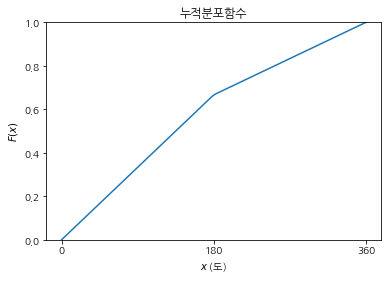

In [66]:
plt.plot(x,y)
plt.ylim(0, 1.0)
plt.xticks([0, 180, 360])
plt.title("누적분포함수")
plt.xlabel("$x$ (도)")
plt.ylabel("$F(x)$")
plt.show()